In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from io import StringIO
from sklearn.metrics import mean_squared_error, r2_score
import time
import urllib.request
import json
from scipy.optimize import curve_fit
import datetime

In [3]:
df1=pd.read_csv('HD_3year.csv')

In [4]:
df = pd.DataFrame(columns=['month','Day','Hour','Minute'])

In [5]:
df1.head(1)

,DateTime,Outdoor_Temperature,DH_Heating_Rate
0,01/01 00:15:00,3.315,556.28


In [6]:
for x in df1['DateTime']:
    m = x[1]+x[2]
    d = x[4]+x[5]
    h = x[7]+x[8]
    mi = x[10]+x[11]
    df = df.append({'month': m,'Day': d,'Hour':h,'Minute':m}, ignore_index=True)

In [7]:
len(df)

105120

In [8]:
len(df1)

105120

In [9]:
df = df.astype(int)

In [10]:
df2 = df1

In [11]:
df2 = df2.join(df)

In [12]:
df2.dtypes

DateTime                object
Outdoor_Temperature    float64
DH_Heating_Rate        float64
month                    int64
Day                      int64
Hour                     int64
Minute                   int64
dtype: object

In [13]:
len(df2)
df2['Outdoor_Temperature'].round(2)

0         3.32
1         3.24
2         3.16
3         3.09
4         3.30
          ... 
105115    2.14
105116    2.33
105117    2.52
105118    2.71
105119    2.90
Name: Outdoor_Temperature, Length: 105120, dtype: float64

In [14]:
df2 =df2[['Outdoor_Temperature','DH_Heating_Rate','month','Day','Hour']]
df2.head()

,Outdoor_Temperature,DH_Heating_Rate,month,Day,Hour
0,3.315,556.28,1,1,0
1,3.240,541.60,1,1,0
2,3.165,459.45,1,1,0
3,3.090,361.11,1,1,0
4,3.295,254.19,1,1,0


In [15]:
df1 = df1[(df1['DH_Heating_Rate'] <= 300)]
df2.dropna
X = df2[['Outdoor_Temperature','Hour','month','Day']]
y = df2['DH_Heating_Rate'].round()


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
model = LinearRegression().fit(X_train, y_train)

In [18]:
model.score(X_train,y_train)

0.831420754687596

In [19]:
model.coef_

array([-12.91542749,  -4.22938592,  -0.13662772,   0.12883671])

In [20]:
predict = model.predict(X_test)

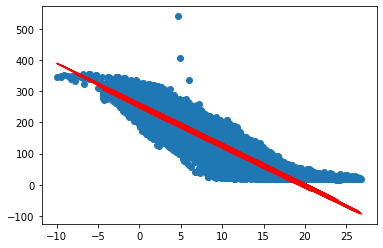

In [21]:
plt.scatter(X_test['Outdoor_Temperature'],y_test)
plt.plot(X_test['Outdoor_Temperature'],predict,'r')

In [22]:
X1 = df1[['Outdoor_Temperature']]

In [23]:
def test(x, a, b, c, d, e, f, g, h, i): 
    return (a+(b*x)+(c*x*x)+(d*x*x*x)+(e*x*x*x*x))/(1+(f*x)+(g*x*x)+(h*x*x*x)+(i*x*x*x*x))

param, param_cov = curve_fit(test, X1, y)
plt.plot(X1, y, 'o', color ='blue', label ="data") 
plt.plot(X1, test(X1, param[0], param[1], param[2],param[3],param[4],param[5],param[6],
                param[7],param[8]), '--', color ='red', label ="optimized data") 

plt.legend() 
plt.show()

ValueError: Unable to coerce to Series, length must be 1: given 105120

In [24]:
param

NameError: name 'param' is not defined

In [31]:
f = urllib.request.urlopen('http://dataservice.accuweather.com/forecasts/v1/hourly/12hour/330088?apikey=cJO52cgVK2bIz3A4dPK0rfjQEBuqGVk3')
# jHCulUAmQjb1DfjoUphGgJdIAmTY8FXq
response = json.loads(f.read())
weatherforecast = pd.DataFrame(columns=['Temp','month','Day','Hour'])
Forecast_DH = np.array([])
for i in range(12):
    temp=round((response[i]['Temperature']['Value']-32)*5/9,2)
    Dt = datetime.datetime.strptime(response[i]['DateTime'], '%Y-%m-%dT%H:%M:%S+01:00')
    weatherforecast = weatherforecast.append({'Temp':temp,'month': Dt.month,'Day': Dt.day,'Hour':Dt.hour}, ignore_index=True)
    #weatherforecast.Temp.round(2)
#for i in weatherforecast:
 #   if (i>27):
  #      Forecast_DH = np.append(Forecast_DH,20).round(2)
   # else:
    #    Forecast_DH = np.append(Forecast_DH,test(i, param[0], param[1], param[2],param[3],param[4],param[5],param[6],
     #           param[7],param[8])).round(2)

In [33]:
model.predict(weatherforecast)

array([12.87348038, 13.00231709, 20.36379319, 27.59611502, 34.95759112,
       49.42255234, 63.88751356, 71.24898967, 68.14911766, 75.38143948,
       75.51027619, 75.6391129 ])

In [34]:
weatherforecast

,Temp,month,Day,Hour
0,16.67,7.0,14.0,16.0
1,16.67,7.0,14.0,17.0
2,16.11,7.0,14.0,18.0
3,15.56,7.0,14.0,19.0
4,15.00,7.0,14.0,20.0
5,13.89,7.0,14.0,21.0
6,12.78,7.0,14.0,22.0
7,12.22,7.0,14.0,23.0
8,12.22,7.0,15.0,0.0
9,11.67,7.0,15.0,1.0


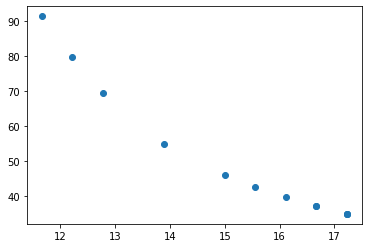

In [17]:
plt.scatter(weatherforecast, Forecast_DH) 

#plt.legend() 
plt.show()

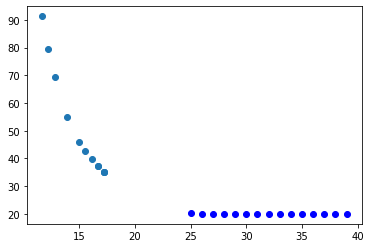

In [18]:
for i in range(25,40,1):
    ans = test(i, param[0], param[1], param[2],param[3],param[4],param[5],param[6],
                param[7],param[8])
    
    if (i >= 27):
        ans = 20
    plt.scatter(i,ans ,color='blue')
    
plt.scatter(weatherforecast, Forecast_DH) 
plt.show()

In [19]:
X.head()

4    3.295
5    3.500
6    3.705
7    3.910
8    4.115
Name: Outdoor_Temperature, dtype: float64

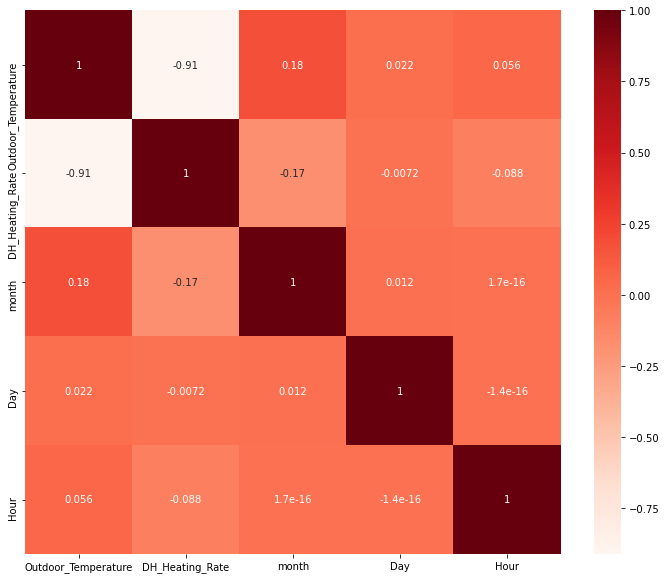

In [35]:
plt.figure(figsize=(12,10))
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()